In [88]:
import nltk
from nltk.corpus import gutenberg
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from urllib import request
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('gutenberg')
nltk.download('stopwords')
# gutenberg.fileids()


[nltk_data] Downloading package gutenberg to /home/lewris/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lewris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Corpus of Interest

In [89]:
corpus_name = 'shakespeare-hamlet.txt'
words = gutenberg.words(corpus_name)
import pandas as pd

corpus_summary = pd.DataFrame([
    {"Corpus": "shakespeare-hamlet.txt", "Total Words (Tokens)": len(words)}
])

corpus_summary.style.hide(axis="index")



Corpus,Total Words (Tokens)
shakespeare-hamlet.txt,37360


The corpus used for this analysis is Shakespeare’s Hamlet from the NLTK Gutenberg collection. It contains 37,360 words in total. This text is a good choice because it has rich language and enough variety to study how word frequencies behave in natural writing.

## 2. How many total unique words are in the corpus?

In [90]:
words_lower = [w.lower() for w in words if w.isalpha()]

#With stopwords
fdist_with = FreqDist(words_lower)

#Without stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in words_lower if w not in stop_words]
fdist_without = FreqDist(filtered_tokens)

summary_df = pd.DataFrame([
    {
        "Case": "With Stopwords",
        "Total Tokens": fdist_with.N(),
        "Unique Words": fdist_with.B()
    },
    {
        "Case": "Without Stopwords",
        "Total Tokens": fdist_without.N(),
        "Unique Words": fdist_without.B()
    }
])

summary_df.style.hide(axis="index")



Case,Total Tokens,Unique Words
With Stopwords,30266,4699
Without Stopwords,15898,4590


Removing stopwords nearly halves the total number of tokens, since common function words make up a large portion of the text. However, the number of unique words remains almost the same, showing that stopwords contribute heavily to frequency but not to vocabulary diversity.

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [91]:

def unique_words_for_half(fdist):
    total_tokens = fdist.N()
    half_point = total_tokens / 2
    cumulative = 0
    unique_count = 0
    for _, count in fdist.most_common():
        cumulative += count
        unique_count += 1
        if cumulative >= half_point:
            break
    return unique_count, cumulative / total_tokens

# With stopwords
unique_with, coverage_with = unique_words_for_half(fdist_with)

# Without stopwords
unique_without, coverage_without = unique_words_for_half(fdist_without)

half_summary = pd.DataFrame([
    {"Case": "With Stopwords", "Unique Words for 50% Coverage": unique_with, "Coverage": f"{coverage_with:.1%}"},
    {"Case": "Without Stopwords", "Unique Words for 50% Coverage": unique_without, "Coverage": f"{coverage_without:.1%}"}
])

half_summary.style.hide(axis="index")


Case,Unique Words for 50% Coverage,Coverage
With Stopwords,72,50.2%
Without Stopwords,265,50.0%


Including stopwords, only 72 unique words account for half of all word occurrences, showing that a small set of very frequent words dominates the text.
After removing stopwords, it takes 265 unique words to cover the same proportion, indicating that once common function words are excluded, the remaining vocabulary is more diverse and evenly distributed.

## 4. Identify the 200 highest frequency words in this corpus

In [ ]:

# Top 200 with stopwords
top_200_with = fdist_with.most_common(200)
top_200_with_df = pd.DataFrame(top_200_with, columns=["Word", "Frequency"])

# Top 200 without stopwords
top_200_without = fdist_without.most_common(200)
top_200_without_df = pd.DataFrame(top_200_without, columns=["Word", "Frequency"])

top_200_with_df.head(10)



,Word,Frequency
0,the,993
1,and,863
2,to,685
3,of,610
4,i,574
5,you,527
6,a,511
7,my,502
8,it,419
9,in,400


In [87]:
top_200_without_df.head(10)

,Word,Frequency
0,ham,337
1,lord,211
2,haue,178
3,king,172
4,thou,107
5,shall,107
6,come,104
7,let,104
8,hamlet,100
9,good,98


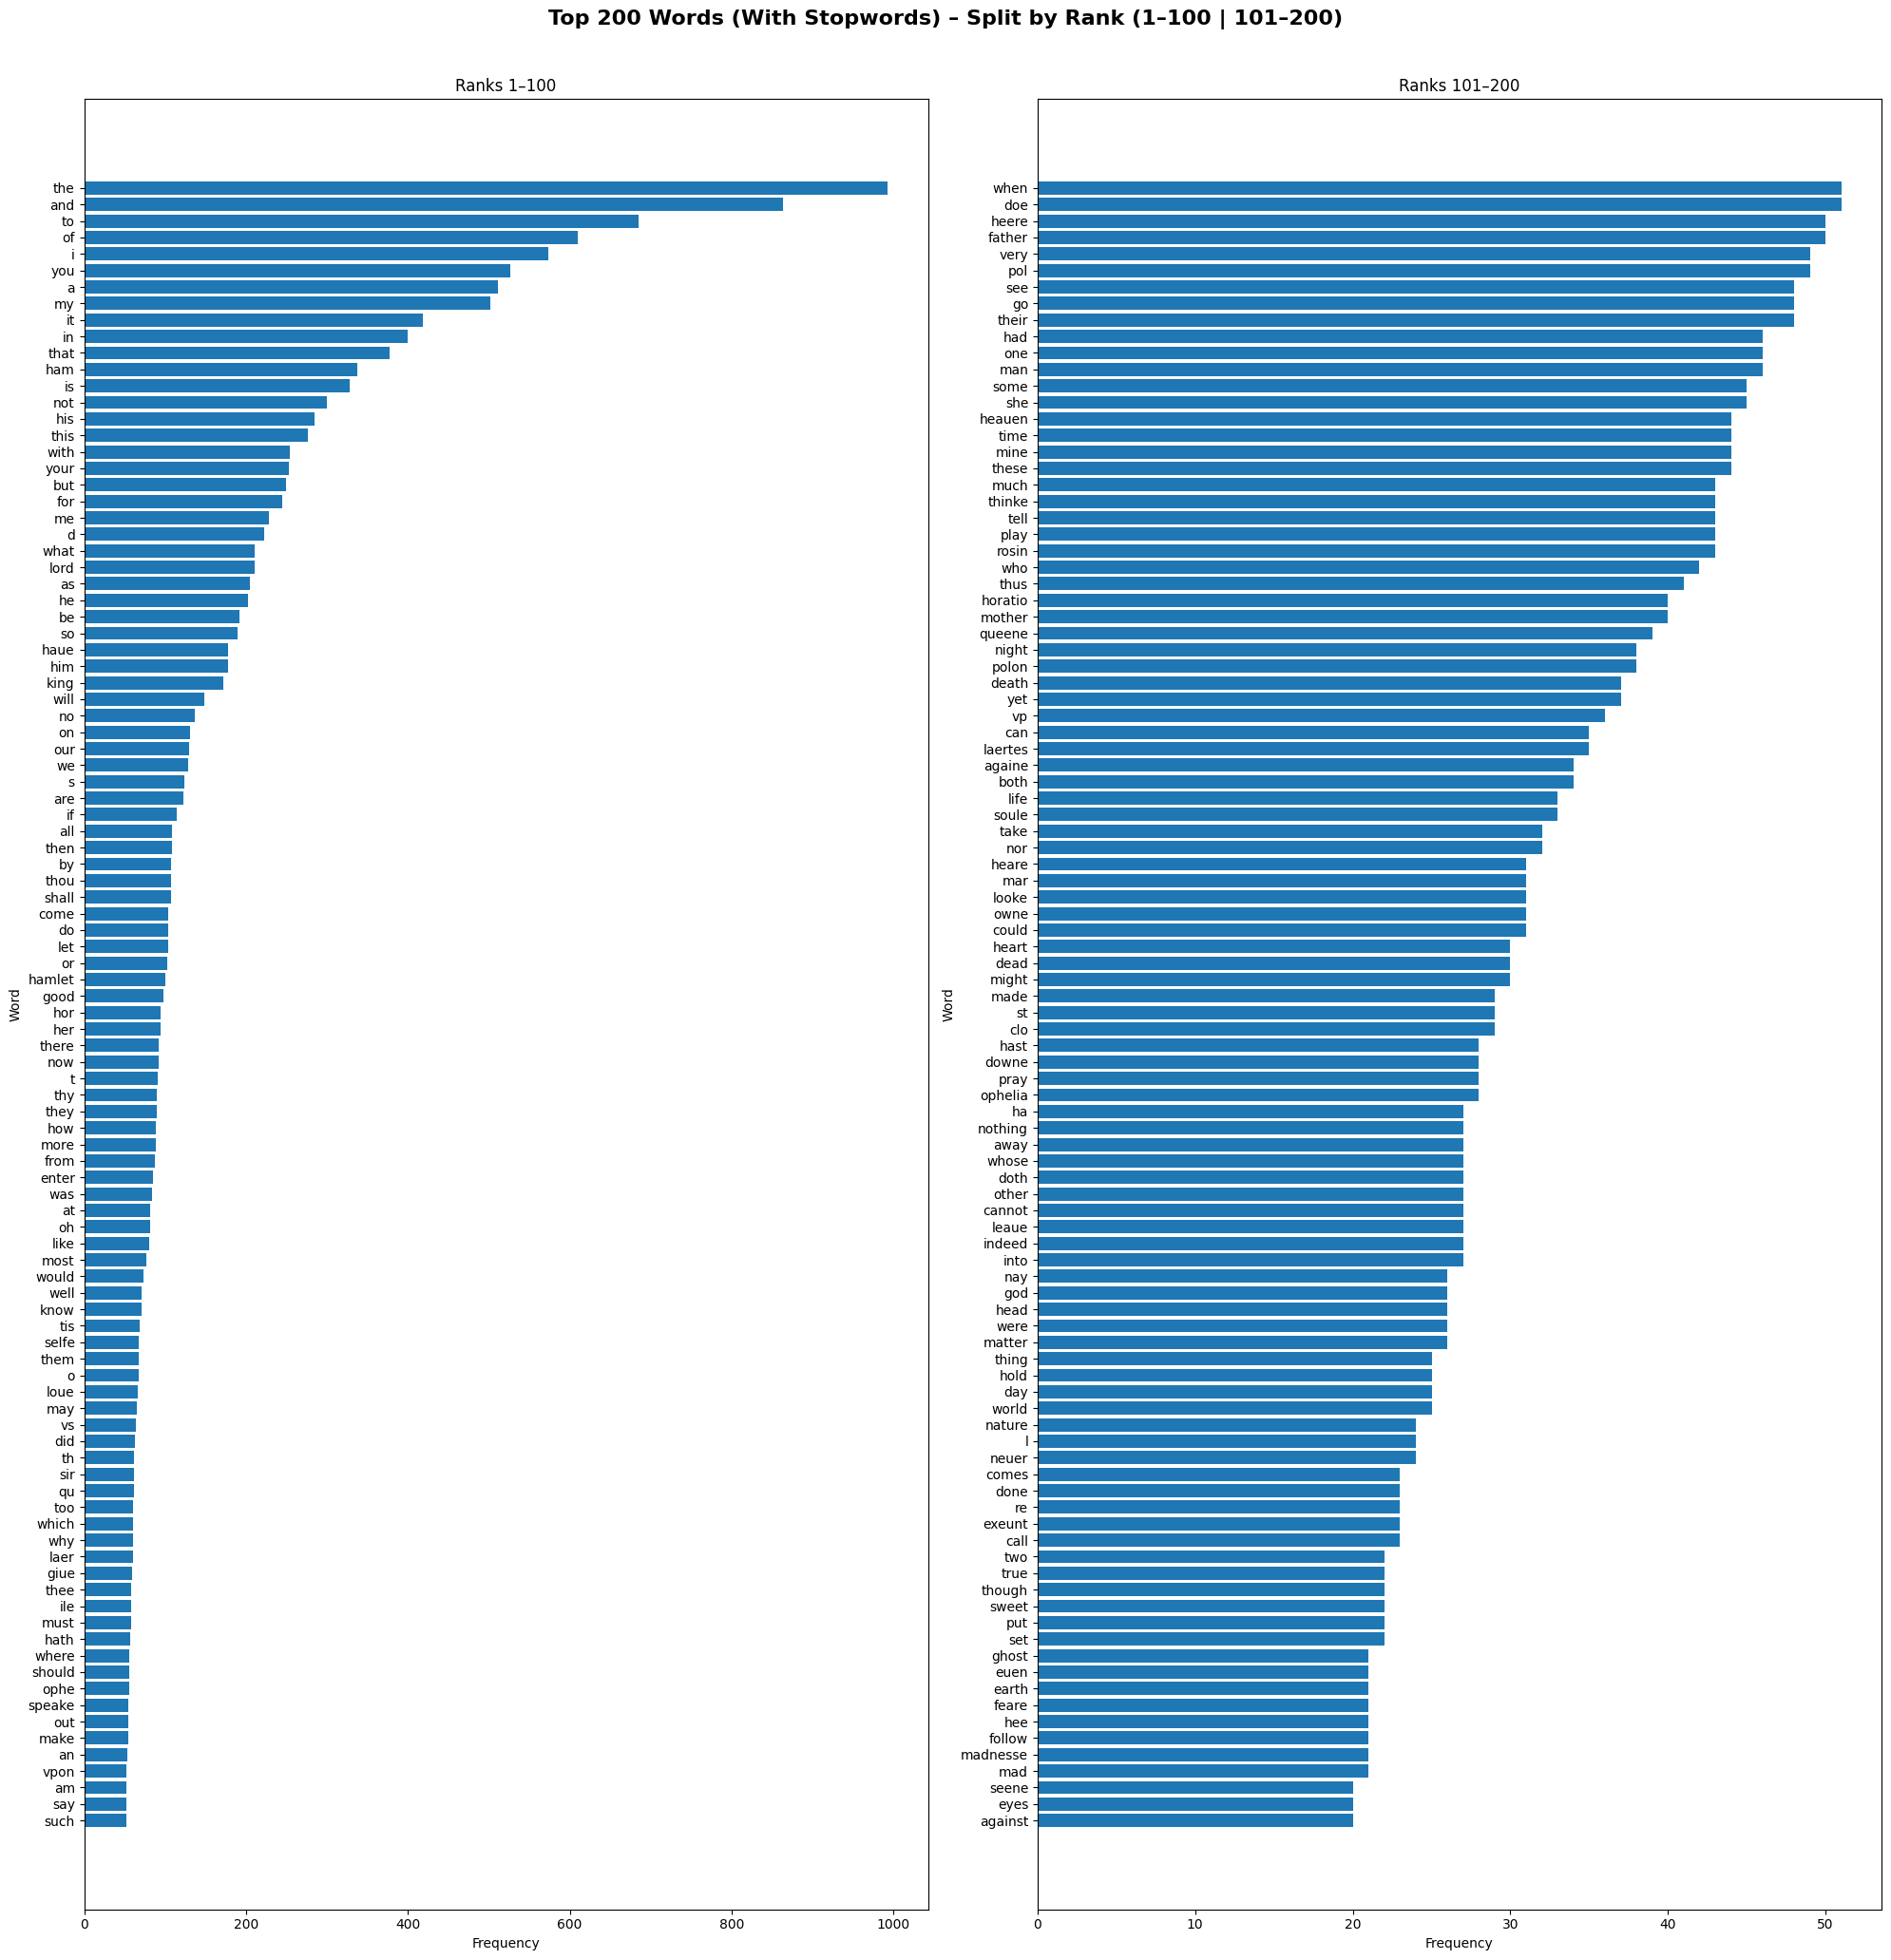

In [78]:

df = top_200_with_df   

subset1 = df.iloc[:100]
subset2 = df.iloc[100:200]

fig, axes = plt.subplots(1, 2, figsize=(20, 21), sharex=False, sharey=False)
fig.suptitle("Top 200 Words (With Stopwords) – Split by Rank (1–100 | 101–200)", fontsize=16, weight='bold')

# Left: Ranks 1–100
axes[0].barh(subset1["Word"][::-1], subset1["Frequency"][::-1])
axes[0].set_title("Ranks 1–100")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Word")

# Right: Ranks 101–200
axes[1].barh(subset2["Word"][::-1], subset2["Frequency"][::-1])
axes[1].set_title("Ranks 101–200")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Word")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()




The figure shows the 200 most frequent words with stopwords included, divided into two panels for clarity. The left chart (ranks 1–100) highlights the dominance of function words such as the, and, to, and of, which appear hundreds of times more often than other terms. The right chart (ranks 101–200) shows a steep decline in frequency, where the remaining words occur much less often.

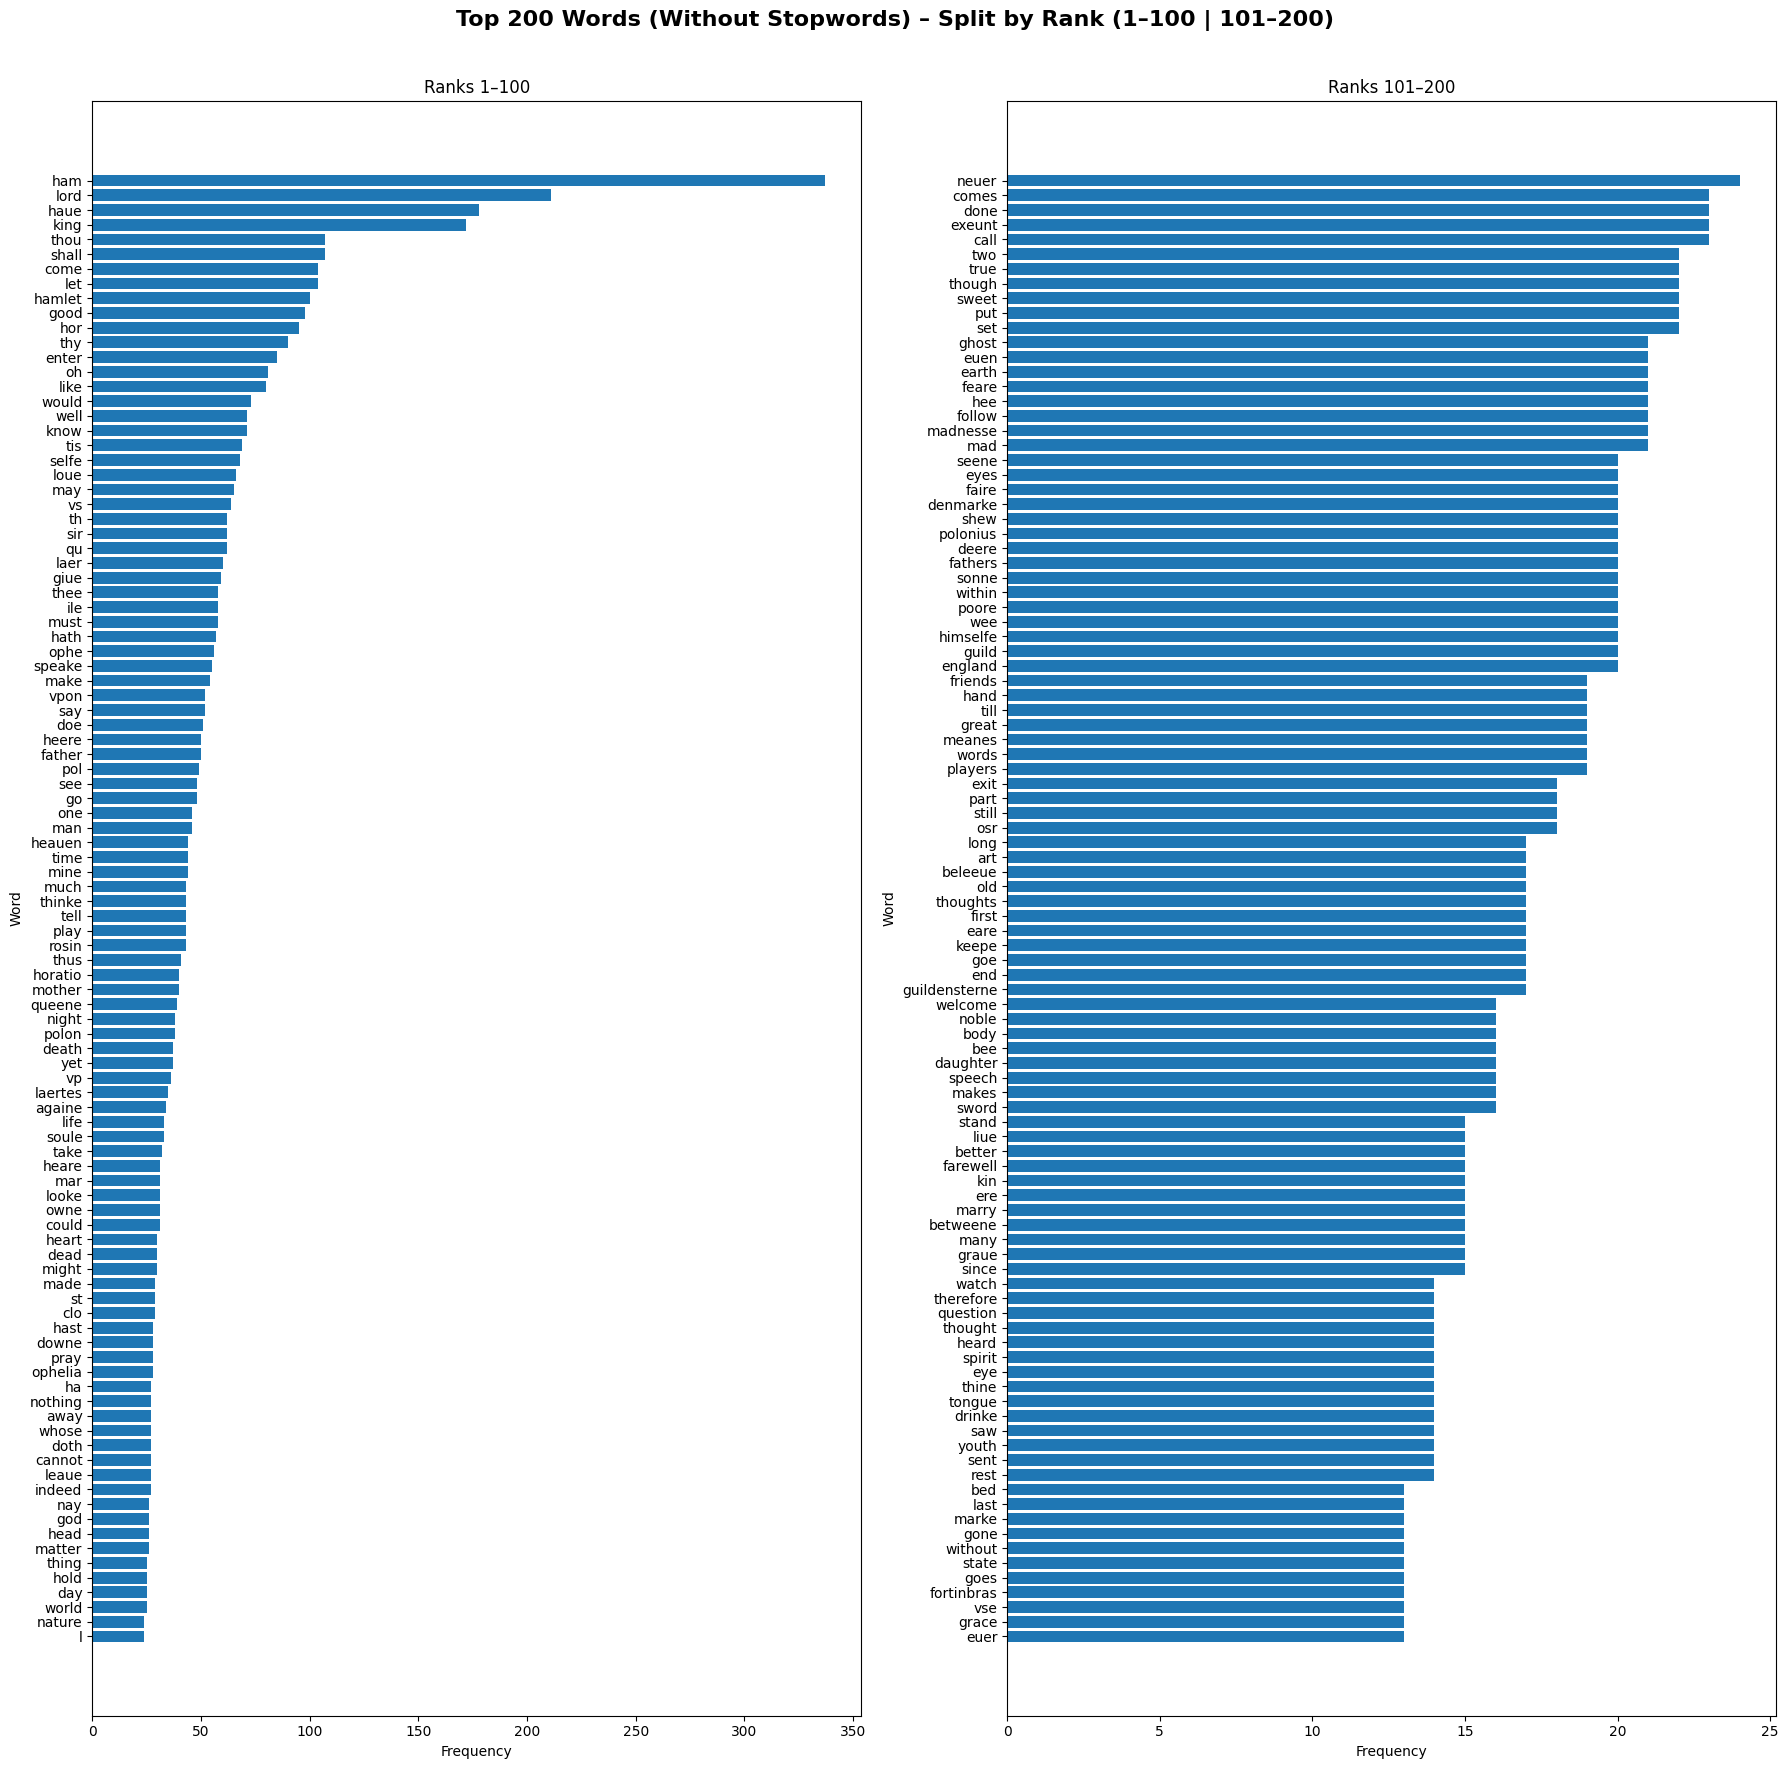

In [72]:
df = top_200_without_df

subset1 = df.iloc[:100]
subset2 = df.iloc[100:200]

fig, axes = plt.subplots(1, 2, figsize=(18, 18), sharex=False, sharey=False)
fig.suptitle("Top 200 Words (Without Stopwords) – Split by Rank (1–100 | 101–200)",
             fontsize=16, weight='bold')

# Left: ranks 1–100
axes[0].barh(subset1["Word"][::-1], subset1["Frequency"][::-1])
axes[0].set_title("Ranks 1–100")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Word")

# Right: ranks 101–200
axes[1].barh(subset2["Word"][::-1], subset2["Frequency"][::-1])
axes[1].set_title("Ranks 101–200")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Word")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The figure shows the 200 most frequent words after removing stopwords, divided into two panels for clarity. The left chart (ranks 1–100) highlights frequently used content words such as ham, lord, king, and time. The right chart (ranks 101–200) shows a further decline in frequency, with more specific words appearing fewer times. Compared to the version with stopwords, this view focuses on meaningful vocabulary like names, actions, and themes, giving a clearer sense of the language and subject matter of the text.This pattern reflects the typical structure of natural language, where a small group of common words makes up most of the text while the rest appear only occasionally, consistent with Zipf’s law.

## 5. Create a graph that shows the relative frequency of these 200 words

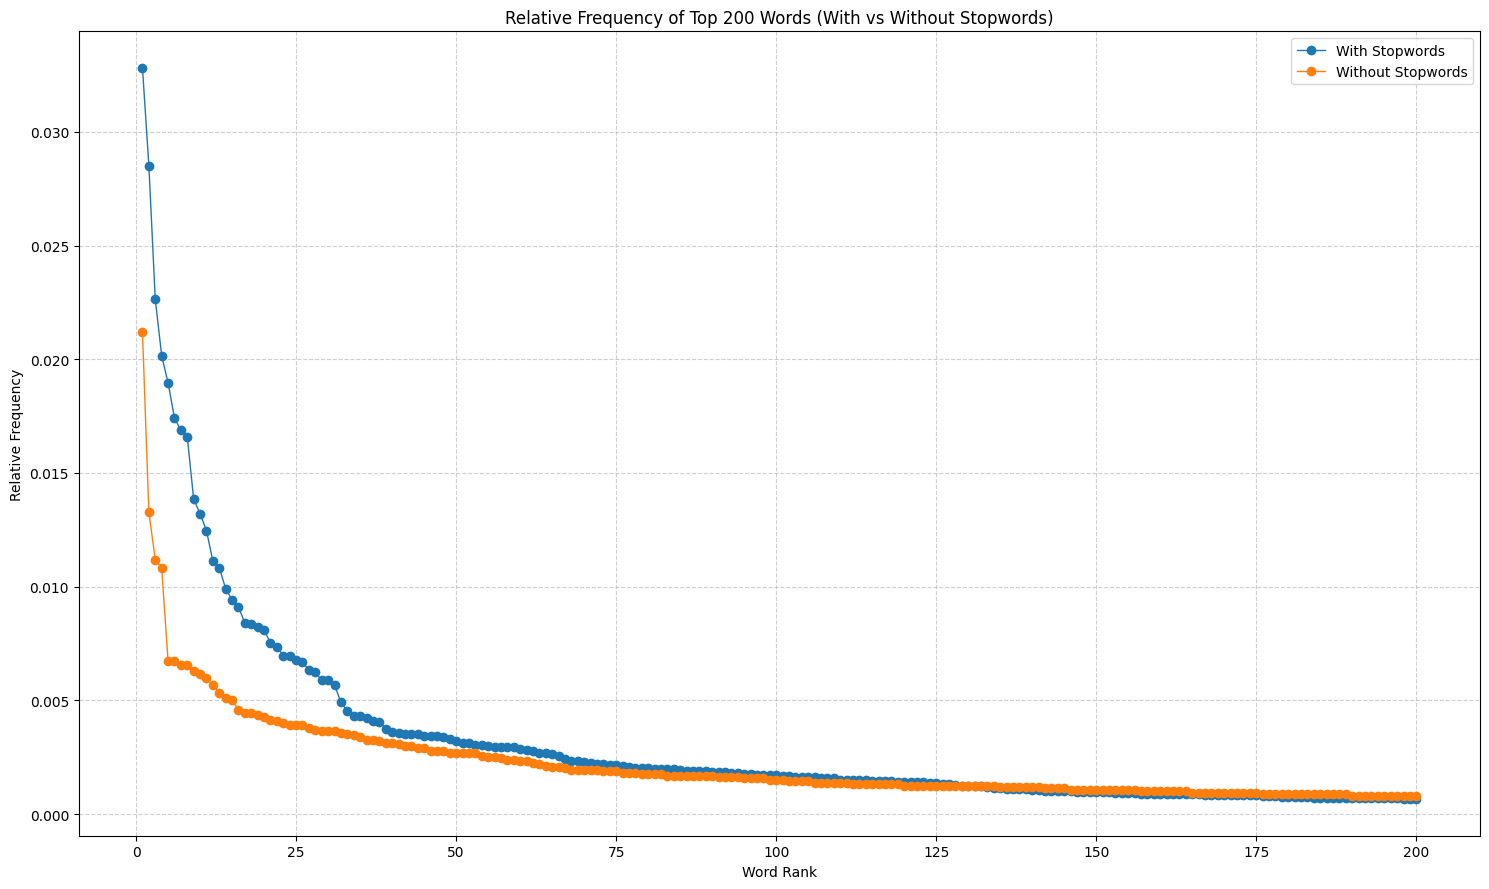

In [80]:

rel_with = [freq / fdist_with.N() for freq in top_200_with_df["Frequency"]]
rel_without = [freq / fdist_without.N() for freq in top_200_without_df["Frequency"]]

plt.figure(figsize=(15, 9))
plt.plot(range(1, 201), rel_with, label="With Stopwords", marker='o', linewidth=1)
plt.plot(range(1, 201), rel_without, label="Without Stopwords", marker='o', linewidth=1)

plt.title("Relative Frequency of Top 200 Words (With vs Without Stopwords)")
plt.xlabel("Word Rank")
plt.ylabel("Relative Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The graph compares the relative frequency of the 200 most common words with and without stopwords. Both curves display a steep decline that flattens as rank increases, showing that a few words dominate the corpus while most appear rarely. The version with stopwords has a sharper initial drop because common function words like the and to occur much more frequently. After removing stopwords, the curve becomes smoother and less extreme, but the same pattern remains, confirming the inverse relationship between word rank and frequency predicted by Zipf’s law.

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

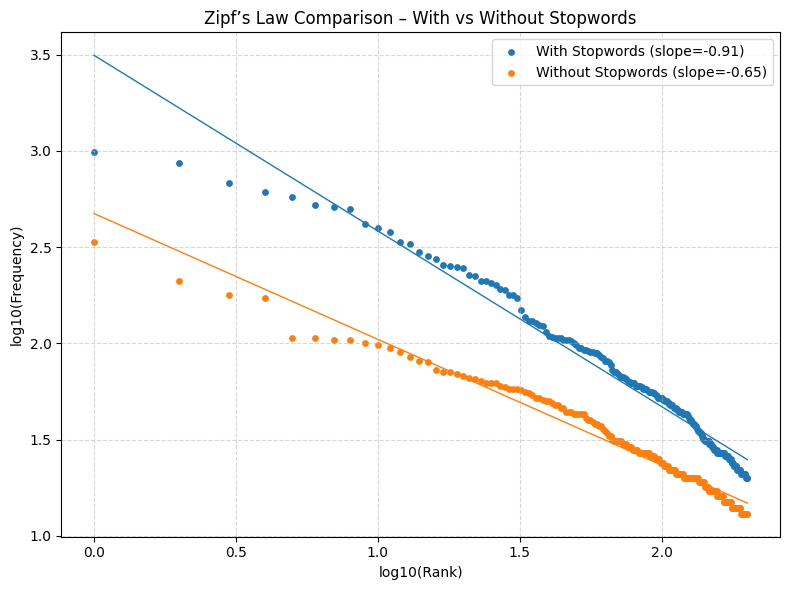

Slope with stopwords: -0.91
Slope without stopwords: -0.65


In [81]:


def plot_zipf(fdist, label):
    top_200 = fdist.most_common(200)
    ranks = np.arange(1, len(top_200) + 1)
    freqs = np.array([f for _, f in top_200])
    log_ranks = np.log10(ranks)
    log_freqs = np.log10(freqs)
    coeffs = np.polyfit(log_ranks, log_freqs, 1)
    slope = coeffs[0]
    intercept = coeffs[1]
    plt.scatter(log_ranks, log_freqs, s=15, label=f"{label} (slope={slope:.2f})")
    plt.plot(log_ranks, np.polyval(coeffs, log_ranks), linewidth=1)
    return slope

plt.figure(figsize=(8,6))
slope_with = plot_zipf(fdist_with, "With Stopwords")
slope_without = plot_zipf(fdist_without, "Without Stopwords")

plt.xlabel("log10(Rank)")
plt.ylabel("log10(Frequency)")
plt.title("Zipf’s Law Comparison – With vs Without Stopwords")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Slope with stopwords: {slope_with:.2f}")
print(f"Slope without stopwords: {slope_without:.2f}")



The plot compares how word frequency changes with rank for both versions of the text. When stopwords are included, the slope is about −0.91, which is very close to the value predicted by Zipf’s law. This means that a few very common words make up most of the text, while the rest occur much less often. After removing stopwords, the slope becomes −0.65, showing that the drop in frequency is less steep because the most frequent function words have been taken out. Even with this change, the same overall pattern remains, and the text still follows Zipf’s law since word frequency continues to decrease as rank increases.

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora”?